## Test Data Engineer: data processing and coding skills

In questo test verrà richiesto lo sviluppo di una Proof of Concept per definire un flusso di elaborazione e analisi dei dati. Questo caso d'uso riguarda i consumi energetici di una smart home. In particolare, si avranno a disposizione due dataset:
* Smart Home (home-data-consumes-raw.csv): contiene tutti i dati dei consumi energetici di una casa nell'arco di una settimana.
* Dati climatici (climate-data.csv): contiene tutti i dati relativi al clima della stessa area geografica della smart home.

# Consigli di carattere generale

1. **Commentare il codice**, specialmente classi e funzioni utilizzando delle *docstrings*, aiuterà chiunque lavori in futuro a questo progetto a comprendere meglio il lavoro svolto
2. Quando vengono generate nuove features o variabili d'appoggio, dare **nomi concisi ma parlanti** permette una migliore comprensione del codice a chi si approcci per la prima volta al problema
3. Non esiste per forza un approccio giusto o sbagliato, potete aggiungere spiegazioni e **commenti** ad integrazioni delle vostre scelte
4. Non è richiesto lo sviluppo di modelli di deep learning ad elevata complessità o l'utilizzo di librerie esotiche, il test è mirato a stabilire alcune **competenze di base** che risultano utili nel lavoro in team e nello sviluppo di un codice production-ready.
5. Al fine di completare il test in un lasso di tempo breve, si consiglia di concentrare i propri sforzi sul testare poche soluzioni valide per una **PoC iniziale**, commentarle ed eventualmente giustificare eventuali semplificazioni introdotte

# Obiettivo e descrizione del problema

Il progetto ha lo scopo di analizzare i consumi di una smart home cercando di individuare le aree che consumano di più e ottimizzarne i consumi anche in relazione alle condizioni climatiche esterne alla casa. Per evitare di andare fuori contesto rispondere semplicemente alle seguenti domande:

1. Quali aree della casa consumano di più?
2. Con quale condizione atmosferica consumo di più? E con quale di meno?
3. Per quanti giorni abbiamo avuto una situazione chiara?
4. Qual è la media dei consumi per ogni area?
5. In media in quali giorni della settimana consumo di più? E quale area in particolare?
6. Per ogni giorno della settimana indicare quale area della casa consuma di più
7. Quale elettrodomestico della cucina consuma di più?
8. Quale dei due forni consuma di più?
9. Quanti kW vengono consumati quando la temperatura è massima? E quali sono i consumi con la temperatura minima?
10. Stessa domanda della 9 ma considerando la copertura di nuvole massimo e quella minima
11. stessa domanda di 9 e 10 ma considerando le precipitazioni massime e minime
12. In quale arco della giornata avviene la produzione massima di energia solare??
13. In quale arco della giornata si consuma di meno?
14. Quanta energia viene prodotta dai pannelli solari quando la temperatura esterna è massima?
15. Quanta energia viene prodotta dai pannelli solari con una copertura di nuvole massima?

Quanto possibile utilizzare grafici per rispondere alle domande
    


# Descrizione Dataset

**home-data-consumes-raw.csv:**
* **Time:** Timestamp della misurazione. E' in secondi, andrebbe trasformato in datetime
* **Gen:** Corrente generata
* **Dishwasher:** Corrente consumata dalla lavastoviglie, si può immaginare che sia in cucina
* **Furnace 1:** Corrente consumata da uno dei forni
* **Furnace 2:** Corrente consumata dal secondo forno
* **Wine Cellar:** Corrente consumata dalla cantina
* **Garage door:** Corrente consumata dalla porta del garage
* **Kitchen 12:** Corrente consumata da un elettrodomestico della cucina
* **Kitchen 14:** Corrente consumata da un elettrodomestico della cucina
* **Kitchen 38:** Corrente consumata da un elettrodomestico della cucina
* **Barn:** Corrente consumata dal fienile
* **Well:** Corrente consumata dal bagno
* **Mirowave:** Corrente consumata dal microonde (molto probabilmente sarà posizionato in cucina)
* **Living room:** Corrente consumata nel soggiorno
* **Solar:** Energia prodotta dai pannelli solari installati sulla casa

**climate-data.csv:**
* **Temperature:** Temperatura fuori dalla casa in gradi Celsius
* **Humidity:** Umidità dell'aria
* **Visibility:** Visibilità
* **Summary:** Variabile categorica che indica in generale com'è il tempo
* **Pressure:** pressione
* **Wind Speed:** velocità del vento penso in m/s
* **Cloud Cover:** Copertura del cielo dalle nuvole. Si misura in oktas, i valori spaziano da 0 a 1, 0 rappresenta assenza completa di nuove e 1 cielo coperto da nuvole
* **Precip Intensity:** Intensità delle precipitazioni (in mm)
* **PrecipProbability:** Probabilità di precipitazioni

# Fasi preprocessing
Questi sono dei suggerimenti su come procedere nelle prime fasi di analisi e processing del dataset. Tuttavia, si tratta di suggerimenti, non si è limitati solo a questi task.

1. Feature Engineering: 
        a. definire una nuova colonna che comprenda i consumi totali della cucina
        b. Ci sono due colonne che forniscono la stessa informazione, rimuoverne una
        c. Definire una nuova colonna che comprenda i consumi dei forni e del microonde
        d. Definire una nuova colonna categorica basata su Cloud Cover. Valori da (0, 0.30) => CIELO CHIARO, valori da (0.31, 0.60) => LEGGERMENTE COPERTO, valori (0.61, 1) => CIELO COPERTO
        e. calcolare la percentuale di energia generata sul totale consumato
2. Il tempo è nel formato timestamp, trasformarlo nel giusto formato YYYY-MM-DD HH:mm:SS
3. Controllare in generale che tutte le colonne siano nel loro giusto formato
4. Gestire i valori Null

# Inizio lavori

In [40]:
# Import delle librerie
# import...
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import os 

# 1. Pre-processing

Analizzare i dataset e trasformare le feauteres nel giusto formato.

In [41]:
# lettura dati
# ...
CLIMATE_DATA_PATH = 'data/climate-data.csv'
SMART_HOME_PATH = 'data/smart-home-data-raw.csv'

# Creazione del DataFrame di climate-data definendo lo schema
schema_climate = {'id': 'int', 'time': 'str', 'temperature': 'float', 'humidity': 'float', 'visibility': 'float', 'summary': 'str',
         'pressure': 'float', 'windSpeed': 'float', 'cloudCover': 'float', 'precipIntensity': 'float', 'precipProbability': 'float'} 

climate_df = pd.read_csv(CLIMATE_DATA_PATH, dtype=schema_climate)


# Creazione del DataFrame di smart-home definendo lo schema
schema_smart_home = {'id': 'int', 'time': 'str', 'gen [kW]': 'float', 'Dishwasher [kW]': 'float', 'Furnace 1 [kW]': 'float', 'Furnace 2 [kW]': 'float',
         'Home office [kW]': 'float', 'Fridge [kW]': 'float', 'Wine cellar [kW]': 'float', 'Garage door [kW]': 'float', 'Kitchen 12 [kW]': 'float',
         'Kitchen 14 [kW]': 'float',  'Kitchen 38 [kW]': 'float', 'Barn [kW]': 'float','Well [kW]': 'float','Microwave [kW]': 'float','Living room [kW]': 'float',
         'Solar [kW]': 'float', 'alexa [kW]': 'float'} 

smart_home_df = pd.read_csv(SMART_HOME_PATH, dtype=schema_smart_home)


### 1.2 Trasformazione dei dati nel loro giusto formato

### 1.1 EDA

Effettuare delle prime visualizzazioni sui dati per comprendere se sono nel giusto formato, visualizzare il loro comportamento e la presenza di valori **NULL**. Non bisogna farlo per tutte le variabili bastano solo le variabili su cui si effettueranno le dovute trasformaizoni.

In [42]:
#Per effettuare una prima visualizzazione dei dati, andrò a mostrare le prime righe dei DataFrame importati al punto precedente:
#Per il file csv climate-data
print(climate_df.head())

#Per il file csv smart-home-data-raw: 
print(smart_home_df.head())

   id        time  temperature  humidity  visibility summary  pressure  \
0   0  1451624400       97.052      0.62        10.0   Clear   1016.91   
1   1  1451624401       97.052      0.62        10.0   Clear   1016.91   
2   2  1451624402       97.052      0.62        10.0   Clear   1016.91   
3   3  1451624403       97.052      0.62        10.0   Clear   1016.91   
4   4  1451624404       97.052      0.62        10.0   Clear   1016.91   

   windSpeed  cloudCover  precipIntensity  precipProbability  
0       9.18         0.0              0.0                0.0  
1       9.18         0.0              0.0                0.0  
2       9.18         0.0              0.0                0.0  
3       9.18         0.0              0.0                0.0  
4       9.18         0.0              0.0                0.0  
   id        time  gen [kW]  Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  \
0   0  1451624400  0.003483         0.000033        0.020700        0.061917   
1   1  1451624401

In [43]:
#Verifico la presenza di valori Null per ogni colonna all'interno dei Dataframe: 
print("visualizzazione dei valori null per il DF: climate_df")
print(climate_df.isnull().sum())
print("visualizzazione dei valori null per il DF: smart_home_df")
print(smart_home_df.isnull().sum())

visualizzazione dei valori null per il DF: climate_df
id                   0
time                 0
temperature          0
humidity             0
visibility           0
summary              0
pressure             0
windSpeed            0
cloudCover           0
precipIntensity      0
precipProbability    0
dtype: int64
visualizzazione dei valori null per il DF: smart_home_df
id                       0
time                     0
gen [kW]                 1
Dishwasher [kW]          1
Furnace 1 [kW]           1
Furnace 2 [kW]           1
Home office [kW]         1
Fridge [kW]              1
Wine cellar [kW]         1
Garage door [kW]         1
Kitchen 12 [kW]          1
Kitchen 14 [kW]          1
Kitchen 38 [kW]          1
Barn [kW]                1
Well [kW]                1
Microwave [kW]           1
Living room [kW]         1
Solar [kW]               1
alexa [kW]          432167
dtype: int64


Nella cella sotto si crea un DataFrame contenente le sole colonne di interesse che definiscono i consumi della zona cucina. 



In [44]:
#Seleziono le colonne di interesse che definiscono i consumi della zona cucina: 
columns_of_interest = ['Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Fridge [kW]', 'Kitchen 12 [kW]', 'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Microwave [kW]']

cucina_df = smart_home_df[columns_of_interest]
print(cucina_df.head())

   Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  Fridge [kW]  \
0         0.000033        0.020700        0.061917     0.124150   
1         0.000000        0.020717        0.063817     0.124000   
2         0.000017        0.020700        0.062317     0.123533   
3         0.000017        0.106900        0.068517     0.123133   
4         0.000133        0.236933        0.063983     0.122850   

   Kitchen 12 [kW]  Kitchen 14 [kW]  Kitchen 38 [kW]  Microwave [kW]  
0         0.000417         0.000150         0.000000        0.004067  
1         0.000417         0.000150         0.000000        0.004067  
2         0.000433         0.000167         0.000017        0.004067  
3         0.000433         0.000217         0.000000        0.004067  
4         0.000450         0.000333         0.000000        0.004067  


Per analizzare il comportamento dei dati: si creano degli instogramma per le varie colonne sui vari Dataset: 
1. per tutti i consumi della cucina. 
2. sull'energia generata.
3. sull'energia solare prodotta. 
4. sulla temperatura fuori dalla casa. 

<Axes: ylabel='Frequency'>

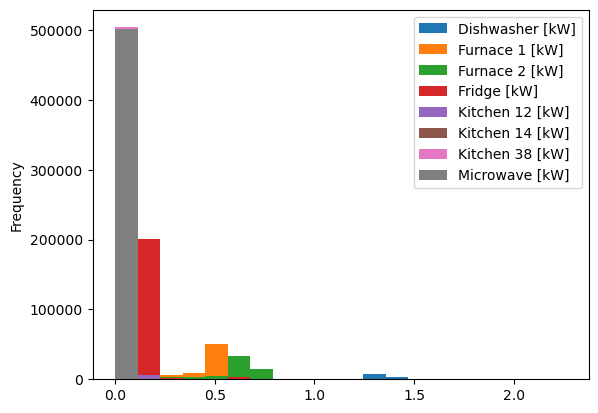

In [6]:
#1. Instogrammi per i consumi della cucina: 
cucina_df.plot(kind='hist', bins=20)

<Axes: ylabel='Frequency'>

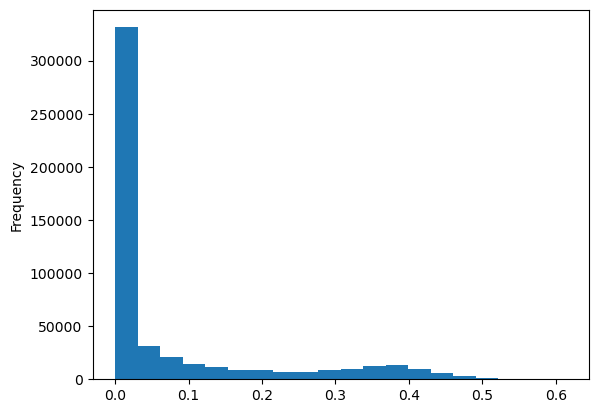

In [7]:
#2. Instogramma sull'energia generata: 
smart_home_df['gen [kW]'].plot(kind='hist', bins=20)

<Axes: ylabel='Frequency'>

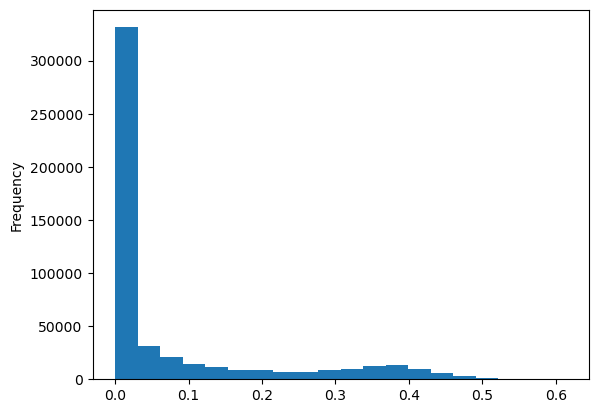

In [8]:
#3. Instogramma sull'energia prodotta dai panelli solari: 
smart_home_df['Solar [kW]'].plot(kind='hist', bins=20)

<Axes: ylabel='Frequency'>

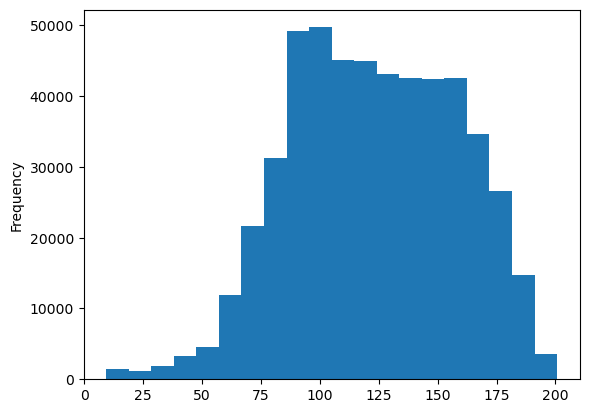

In [9]:
#4. Istagramma sulla temperatura fuori dalla casa: 
climate_df['temperature'].plot(kind='hist', bins=20)

### 1.3 Feature Engineering

Questi sono dei suggerimenti su come procedere nelle prime fasi di feature engineering. Tuttavia, si tratta di suggerimenti, non si è limitati solo a questi task.

1. Feature Engineering: 
        a. definire una nuova colonna che comprenda i consumi totali della cucina
        b. Ci sono due colonne che forniscono la stessa informazione, rimuoverne una
        c. Definire una nuova colonna che comprenda i consumi dei forni e del microonde
        d. Definire una nuova colonna categorica basata su Cloud Cover. Valori da (0, 0.30) => CIELO CHIARO, valori da (0.31, 0.60) => LEGGERMENTE COPERTO, valori (0.61, 1) => CIELO COPERTO
        e. calcolare la percentuale di energia generata sul totale consumato
2. Il tempo è nel formato timestamp, trasformarlo nel giusto formato YYYY-MM-DD HH:mm:SS
3. Gestire i valori Null

In [45]:
#a. definire una nuova colonna che comprenda i consumi totali della cucina
#Definisco il DF
column_interest_smart_home = ['id', 'time', 'gen [kW]', 'Home office [kW]', 'Wine cellar [kW]', 'Garage door [kW]', 'Barn [kW]',
                             'Well [kW]', 'Living room [kW]', 'Solar [kW]', 'alexa [kW]']

df_smart_home_cucina = smart_home_df[column_interest_smart_home]

#somma dei consumi totali della cucina: 
sum_consumi_cucina = cucina_df.sum(axis = 1, skipna = True)
df_consumi_cucina = pd.DataFrame(sum_consumi_cucina)

#estrare i valori della seconda colonna
values_cucina = df_consumi_cucina.iloc[:, 0]

#Si crea la colonna 'cucina' nel DF
df_smart_home_cucina = df_smart_home_cucina.assign(cucina=values_cucina)

print(df_smart_home_cucina.head())

   id        time  gen [kW]  Home office [kW]  Wine cellar [kW]  \
0   0  1451624400  0.003483          0.442633          0.006983   
1   1  1451624401  0.003467          0.444067          0.006983   
2   2  1451624402  0.003467          0.446067          0.006983   
3   3  1451624403  0.003483          0.446583          0.006983   
4   4  1451624404  0.003467          0.446533          0.006850   

   Garage door [kW]  Barn [kW]  Well [kW]  Living room [kW]  Solar [kW]  \
0          0.013083   0.031350   0.001017          0.001517    0.003483   
1          0.013117   0.031500   0.001017          0.001650    0.003467   
2          0.013083   0.031517   0.001000          0.001650    0.003467   
3          0.013000   0.031500   0.001017          0.001617    0.003483   
4          0.012783   0.031500   0.001017          0.001583    0.003467   

   alexa [kW]    cucina  
0         NaN  0.211433  
1         NaN  0.213167  
2         NaN  0.211250  
3         NaN  0.303283  
4         NaN  0

In [11]:
#b. Ci sono due colonne che forniscono la stessa informazione, rimuoverne una

#metodo che individua se ci sono dei duplicati nei DF
def getDuplicateColumns(df):
 
    #Creazione di un Set
    lista_colonne_duplicati = set()
 
    #Iterare sulle colonne del DF  
    for x in range(df.shape[1]):
 
        #Prende la colonna alla posizione x-esima
        col = df.iloc[:, x]
 
        #Iterare sulle colonne del DF dalla posizione x+1 fino alla fine
        for y in range(x + 1, df.shape[1]):
 
            #Prende la colonna alla posizione y-esima
            otherCol = df.iloc[:, y]
 
            #Check se le colonne x e y sono uguali
            if col.equals(otherCol):
                lista_colonne_duplicati.add(df.columns.values[y])
 
    #Return della lista delle colonne duplicate
    return list(lista_colonne_duplicati)


print("Duplicati nel DF: climate_df")
duplicateColNames_climate = getDuplicateColumns(climate_df)

if(len(duplicateColNames_climate)==0): 
    print("Non ci sono duplicati nel df: climate_df")
else:
    for column in duplicateColNames_climate:
        climate_df = climate_df.drop([column], axis = 1)
        print('Column Name : ', column)
    
print("Duplicati nel DF: smart_home_df")
duplicateColNames_smart_home = getDuplicateColumns(smart_home_df)

if(len(duplicateColNames_smart_home)==0):
    print("Non ci sono duplicati nel df: smart_home_df")
else: 
    for column in duplicateColNames_smart_home:
        df_smart_home_cucina = df_smart_home_cucina.drop([column], axis = 1)
        print('Column Name : ', column)


Duplicati nel DF: climate_df
Non ci sono duplicati nel df: climate_df
Duplicati nel DF: smart_home_df
Column Name :  Solar [kW]


In [12]:
#c. Definire una nuova colonna che comprenda i consumi dei forni e del microonde 
column_forno_micro = ['Furnace 1 [kW]', 'Furnace 2 [kW]','Microwave [kW]']

df_forno_micro = smart_home_df[column_forno_micro]

sum_forno_micro = df_forno_micro.sum(axis = 1, skipna = True)

df_smart_home_cucina = df_smart_home_cucina.assign(forno_micro=sum_forno_micro)

print(df_smart_home_cucina)

            id        time  gen [kW]  Home office [kW]  Wine cellar [kW]  \
0            0  1451624400  0.003483          0.442633          0.006983   
1            1  1451624401  0.003467          0.444067          0.006983   
2            2  1451624402  0.003467          0.446067          0.006983   
3            3  1451624403  0.003483          0.446583          0.006983   
4            4  1451624404  0.003467          0.446533          0.006850   
...        ...         ...       ...               ...               ...   
503906  503906  1452128306  0.003233          0.041750          0.008433   
503907  503907  1452128307  0.003217          0.042033          0.008467   
503908  503908  1452128308  0.003217          0.042100          0.008233   
503909  503909  1452128309  0.003233          0.042100          0.008133   
503910  503910           \       NaN               NaN               NaN   

        Garage door [kW]  Barn [kW]  Well [kW]  Living room [kW]  alexa [kW]  \
0      

In [13]:
#d. Definire una nuova colonna categorica basata su Cloud Cover. Valori da (0, 0.30) => CIELO CHIARO, 
#valori da (0.31, 0.60) => LEGGERMENTE COPERTO, valori (0.61, 1) => CIELO COPERTO

def categorizza_cloud_cover(valore):
    if 0 <= valore <= 0.30:
        return 'CIELO CHIARO'
    elif 0.31 <= valore <= 0.60:
        return 'LEGGIAMENTE COPERTO'
    elif 0.61 <= valore <= 1:
        return 'CIELO COPERTO'
    else:
        return 'Valore non valido'
    
cielo = climate_df['cloudCover'].apply(categorizza_cloud_cover)

climate_df = climate_df.assign(cielo=cielo)

print(climate_df)

            id                 time  temperature  humidity  visibility  \
0            0           1451624400    97.052000  0.620000   10.000000   
1            1           1451624401    97.052000  0.620000   10.000000   
2            2           1451624402    97.052000  0.620000   10.000000   
3            3           1451624403    97.052000  0.620000   10.000000   
4            4           1451624404    97.052000  0.620000   10.000000   
...        ...                  ...          ...       ...         ...   
516147  516148  2016-02-29 20:00:00    15.084529  0.481439    4.947440   
516148  516149  2016-02-29 21:00:00    48.704089  0.910807    5.035099   
516149  516150  2016-02-29 22:00:00   149.482032  0.715184    7.215318   
516150  516151  2016-02-29 23:00:00   187.476042  0.661583    6.919818   
516151  516152  2016-03-01 00:00:00    42.813651  0.412510    7.970876   

           summary     pressure  windSpeed  cloudCover  precipIntensity  \
0            Clear  1016.910000   9.

0         9.969736e-07
1         9.922035e-07
2         9.922035e-07
3         9.969736e-07
4         9.922035e-07
              ...     
503906    9.254204e-07
503907    9.206504e-07
503908    9.206504e-07
503909    9.254204e-07
503910             NaN
Name: gen [kW], Length: 503911, dtype: float64


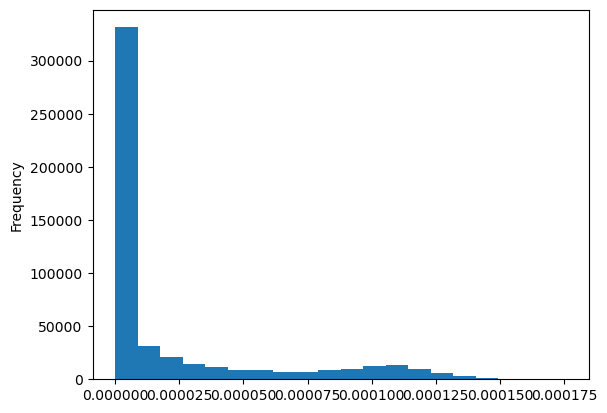

In [14]:
#e. calcolare la percentuale di energia generata sul totale consumato

column_interest_consumi = ['Home office [kW]', 'Wine cellar [kW]', 'Garage door [kW]', 'Barn [kW]',
                             'Well [kW]', 'Living room [kW]', 'alexa [kW]', 'cucina']

df_smart_home_consumi_tot = df_smart_home_cucina[column_interest_consumi]

sum_consumi_tot = df_smart_home_consumi_tot.sum(axis = 1, skipna = True)

percentuale = (df_smart_home_cucina['gen [kW]'] / sum_consumi_tot.sum()) * 100 

percentuale.plot(kind='hist', bins=20)
print(percentuale)

3. Gestire i valori Null

Per la gestione dei valori Null, dall'analisi fatta sopra, si è visto che la colonna Alexa è piena di valori Null, ovvero ha ben 432167 righe a Null, oltre ciò, dall'analisi svolta sulle query che bisogna implementare al punto 2, la colonna Alexa non viene mai richiesta. Quindi fatte queste considerazioni si è deciso di eliminare la colonna Alexa.

NOTA: Prima di eseguire il punto 2, eseguo la gestione del valori null

In [15]:
#3. Gestire i valori Null

#Eliminazione della colonna Alexa: 
df_smart_home_cucina = df_smart_home_cucina.drop(['alexa [kW]'], axis = 1)


In [16]:
#Eliminazione delle righe con il valore null: 

df_smart_home_cucina = df_smart_home_cucina.dropna(how='any')
print(df_smart_home_cucina.isnull().sum())


id                  0
time                0
gen [kW]            0
Home office [kW]    0
Wine cellar [kW]    0
Garage door [kW]    0
Barn [kW]           0
Well [kW]           0
Living room [kW]    0
cucina              0
forno_micro         0
dtype: int64


In [17]:
#2. Il tempo è nel formato timestamp, trasformarlo nel giusto formato YYYY-MM-DD HH:mm:SS
# La formattazione del tempo viene eseguita per entrambi i Dataframe 
from datetime import datetime
df_form = pd.DataFrame()

def formattazione_tempo(valore): 
    try:
        datetime_object = datetime.strptime(valore, '%Y-%m-%d %H:%M:%S')
    except ValueError:
        datetime_object = datetime.fromtimestamp(int(valore))
    return datetime_object


df_smart_home_cucina["tempo"] = df_smart_home_cucina['time'].apply(formattazione_tempo)
climate_df["tempo"] = climate_df['time'].apply(formattazione_tempo)
print(df_smart_home_cucina)
print(climate_df)

            id        time  gen [kW]  Home office [kW]  Wine cellar [kW]  \
0            0  1451624400  0.003483          0.442633          0.006983   
1            1  1451624401  0.003467          0.444067          0.006983   
2            2  1451624402  0.003467          0.446067          0.006983   
3            3  1451624403  0.003483          0.446583          0.006983   
4            4  1451624404  0.003467          0.446533          0.006850   
...        ...         ...       ...               ...               ...   
503905  503905  1452128305  0.003183          0.041783          0.008667   
503906  503906  1452128306  0.003233          0.041750          0.008433   
503907  503907  1452128307  0.003217          0.042033          0.008467   
503908  503908  1452128308  0.003217          0.042100          0.008233   
503909  503909  1452128309  0.003233          0.042100          0.008133   

        Garage door [kW]  Barn [kW]  Well [kW]  Living room [kW]    cucina  \
0        

In [18]:
#Eliminazione della colonna time che è stata già trasformata nella colonna "tempo"
df_smart_home_cucina = df_smart_home_cucina.drop(['time'], axis = 1)
climate_df = climate_df.drop(['time'], axis = 1)


### 1.4 Data Integration

Integrare i dati della smart home con quelli del clima

In [19]:
#Fatta la merge dei 2 DF sulla colonna tempo
df_integrato = df_smart_home_cucina.merge(climate_df, on="tempo")
print(df_integrato)


          id_x  gen [kW]  Home office [kW]  Wine cellar [kW]  \
0            0  0.003483          0.442633          0.006983   
1            0  0.003483          0.442633          0.006983   
2            1  0.003467          0.444067          0.006983   
3            2  0.003467          0.446067          0.006983   
4            3  0.003483          0.446583          0.006983   
...        ...       ...               ...               ...   
504045  503905  0.003183          0.041783          0.008667   
504046  503906  0.003233          0.041750          0.008433   
504047  503907  0.003217          0.042033          0.008467   
504048  503908  0.003217          0.042100          0.008233   
504049  503909  0.003233          0.042100          0.008133   

        Garage door [kW]  Barn [kW]  Well [kW]  Living room [kW]    cucina  \
0               0.013083   0.031350   0.001017          0.001517  0.211433   
1               0.013083   0.031350   0.001017          0.001517  0.211433 

# 2. Rispondere alle domande obiettivo

### 1. Quali aree della casa consumano di più?


le aree della casa che consumano di più sono:
cucina              177217.204864
Home office [kW]     40961.277962
Barn [kW]            29493.633696
Wine cellar [kW]     21233.079320
Living room [kW]     17794.476716
Well [kW]             7882.163852
Garage door [kW]      7124.847316
dtype: float64 ,grafico:



<Axes: ylabel='Frequency'>

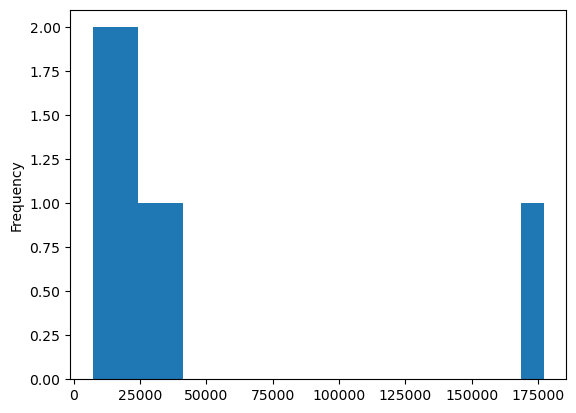

In [20]:
colonne_interesse_consumi = ["Home office [kW]", "Wine cellar [kW]", "Garage door [kW]", "Barn [kW]", "Well [kW]",
                             "Living room [kW]", "cucina"]

df_consumi_casa = df_smart_home_cucina[colonne_interesse_consumi]

consumi_totali = df_consumi_casa.sum()

#si ordinano i valori 
consumi_totali_order = consumi_totali.sort_values(ascending=False)

print(f"le aree della casa che consumano di più sono:\n{consumi_totali_order} ,grafico:\n")
consumi_totali_order.plot(kind='hist', bins=20)


### 2. Con quale condizione atmosferica consumo di più? E con quale di meno?


In [21]:
consumo_totale_per_condizione = df_integrato.groupby('summary')[['Home office [kW]', 'Wine cellar [kW]', 'Garage door [kW]', 'Barn [kW]', 'Well [kW]', 'Living room [kW]', 'cucina']].sum()

condizione_max_consumo = consumo_totale_per_condizione.sum(axis=1).idxmax()
condizione_min_consumo = consumo_totale_per_condizione.sum(axis=1).idxmin()

print(f"con la seguente condizione: {condizione_max_consumo} si ha il consumo max")
print(f"con la seguente condizione: {condizione_min_consumo} si ha il consumo min")


con la seguente condizione: Clear si ha il consumo max
con la seguente condizione: Dry si ha il consumo min


### 3. Per quanti giorni abbiamo avuto una situazione chiara?


In [22]:
situazione_chiara = df_integrato[df_integrato['cielo'] == 'CIELO CHIARO']

giorni_chiari = situazione_chiara.groupby('tempo').size()

count = len(giorni_chiari)

print(f"Il numero di giorni in cui la situazione è stata chiara è: {count}")

Il numero di giorni in cui la situazione è stata chiara è: 380826


### 4. Qual è la media dei consumi per ogni area?


consumi medii dell'area della casa:
Home office [kW]    0.081287
Wine cellar [kW]    0.042137
Garage door [kW]    0.014139
Barn [kW]           0.058530
Well [kW]           0.015642
Living room [kW]    0.035313
cucina              0.351684
dtype: float64


<Axes: ylabel='Frequency'>

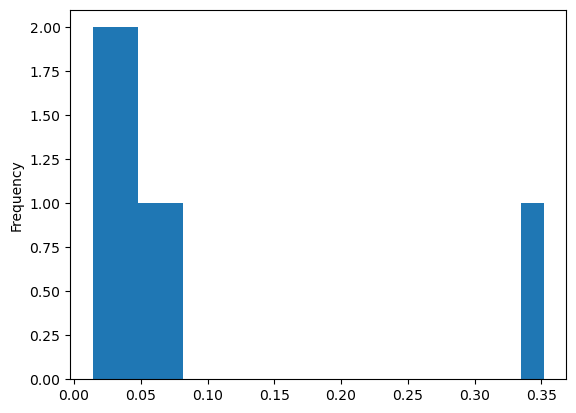

In [23]:
#NOTA: utilizzo il DF definito nella query 1 (df_consumi_casa)

consumi_media = df_consumi_casa.mean()

print(f"consumi medii dell'area della casa:\n{consumi_media}")

consumi_media.plot(kind='hist', bins=20)


### 5. In media in quali giorni della settimana consumo di più? E quale area in particolare?


In [24]:
df_integrato['giorno_settimana'] = df_integrato['tempo'].dt.day_name()

#Raggruppa i dati per giorno della settimana e area: 
consumi_per_giorno_area = df_integrato.groupby(['giorno_settimana'])[['Home office [kW]', 'Wine cellar [kW]', 'Garage door [kW]', 'Barn [kW]', 'Well [kW]', 'Living room [kW]', 'cucina']].mean()

consumi_medi_settimana = consumi_per_giorno_area.idxmax()

print(f"I consumi medi della settimana sono riferiti al giorno e nelle seguenti aree:\n{consumi_medi_settimana}")


I consumi medi della settimana sono riferiti al giorno e nelle seguenti aree:
Home office [kW]       Monday
Wine cellar [kW]       Monday
Garage door [kW]    Wednesday
Barn [kW]              Friday
Well [kW]            Saturday
Living room [kW]     Thursday
cucina                 Friday
dtype: object


### 6. Per ogni giorno della settimana indicare quale area della casa consuma di più


In [25]:
#NOTA: Si utilizza il raggruppamento definito nel punto di sopra: consumi_per_giorno_area 

area_massima_per_giorno = consumi_per_giorno_area.idxmax(axis=1)

print(f"area della casa che consuma di più nei giorni:\n{area_massima_per_giorno}")


area della casa che consuma di più nei giorni:
giorno_settimana
Friday       cucina
Monday       cucina
Saturday     cucina
Sunday       cucina
Thursday     cucina
Tuesday      cucina
Wednesday    cucina
dtype: object


### 7. Quale elettrodomestico della cucina consuma di più?


l'elettrodomestico che consuma di pià nella cucina è: Furnace 2 [kW] con il valore 68924.4 [kW]


<Axes: ylabel='Frequency'>

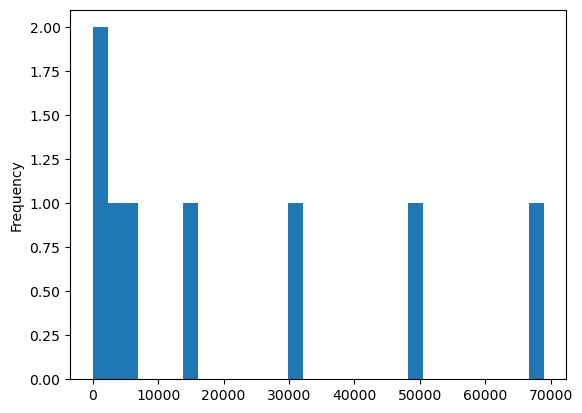

In [26]:
elettrodomestico = cucina_df.sum()
elettrodomestico_massimo = elettrodomestico.idxmax()
valore = round(elettrodomestico.max(), 2)

print(f"l'elettrodomestico che consuma di pià nella cucina è: {elettrodomestico_massimo} con il valore {valore} [kW]")
elettrodomestico.plot(kind='hist', bins=30)


### 8. Quale dei due forni consuma di più?


In [27]:
forno_1 = smart_home_df["Furnace 1 [kW]"].sum()
forno_2 = smart_home_df["Furnace 2 [kW]"].sum()

if(forno_1 > forno_2): 
    print("forno 1 consuma di più con valore.")
else: 
    print("forno 2 consuma di più con valore.")

forno 2 consuma di più con valore.


### 9. Quanti kW vengono consumati quando la temperatura è massima? E quali sono i consumi con la temperatura minima?


In [28]:
#trovare temperatura max e min
temperatura_max = df_integrato['temperature'].max()
temperatura_min = df_integrato['temperature'].min()

#Filtrare i dati per le temperature massime e minime:
df_temperatura_max = df_consumi_casa.loc[df_integrato['temperature'] == temperatura_max]
df_temperatura_min = df_consumi_casa.loc[df_integrato['temperature'] == temperatura_min]

#Calcola i consumi per le temperature massime e minime: 
consumo_max = round(df_temperatura_max.sum().sum(),2)
consumo_min = round(df_temperatura_min.sum().sum(),2)

print(f"Vengono consumati {consumo_max} kW quando la temperatura è massima.")
print(f"Vengono consumati {consumo_min} kW quando la temperatura è minima.")


Vengono consumati 72.62 kW quando la temperatura è massima.
Vengono consumati 57.09 kW quando la temperatura è minima.


### 10. Stessa domanda della 9 ma considerando la copertura di nuvole massimo e quella minima


In [29]:
# Trova copertura massima e minima delle nuvole
nuvole_max = df_integrato['cloudCover'].max()
nuvole_min = df_integrato['cloudCover'].min()

# Filtra i dati per le temperature massime e minime e copertura massima e minima delle nuvole
df_temp_nuvole_max = df_consumi_casa.loc[(df_integrato['temperature'] == temperatura_max) & (df_integrato['cloudCover'] == nuvole_max)]
df_temp_nuvole_min = df_consumi_casa.loc[(df_integrato['temperature'] == temperatura_min) & (df_integrato['cloudCover'] == nuvole_min)]

# Calcola i consumi per le temperature massime e minime con copertura massima e minima delle nuvole
consumo_max_nuvole = round(df_temp_nuvole_max.sum().sum(), 2)
consumo_min_nuvole = round(df_temp_nuvole_min.sum().sum(), 2)

print(f"Vengono consumati {consumo_max_nuvole} kW quando la temperatura è massima e la copertura delle nuvole è massima.")
print(f"Vengono consumati {consumo_min_nuvole} kW quando la temperatura è minima e la copertura delle nuvole è minima.")


Vengono consumati 0.0 kW quando la temperatura è massima e la copertura delle nuvole è massima.
Vengono consumati 57.09 kW quando la temperatura è minima e la copertura delle nuvole è minima.


### 11. stessa domanda di 9 e 10 ma considerando le precipitazioni massime e minime


In [30]:
# Trova precipitazioni massime e minime
precipitazioni_max = df_integrato['precipIntensity'].max()
precipitazioni_min = df_integrato['precipIntensity'].min()


# Filtra i dati per le temperature massime e minime e copertura massima e minima delle nuvole
df_temp_precipitazioni_max = df_consumi_casa.loc[(df_integrato['temperature'] == temperatura_max) & (df_integrato['cloudCover'] == nuvole_max) & (df_integrato['precipIntensity'] == precipitazioni_max)]
df_temp_precipitazioni_min = df_consumi_casa.loc[(df_integrato['temperature'] == temperatura_min) & (df_integrato['cloudCover'] == nuvole_min) & (df_integrato['precipIntensity'] == precipitazioni_min)]

# Calcola i consumi per le temperature massime e minime con copertura massima e minima delle nuvole
consumo_max_prec = round(df_temp_precipitazioni_max.sum().sum(), 2)
consumo_min_prec = round(df_temp_precipitazioni_min.sum().sum(), 2)

print(f"Vengono consumati {consumo_max_prec} kW quando la temperatura è massima, la copertura delle nuvole è massima e le precipitazioni sono massime.")
print(f"Vengono consumati {consumo_min_prec} kW quando la temperatura è minima, la copertura delle nuvole è minima e le precipitazioni sono minime.")



Vengono consumati 0.0 kW quando la temperatura è massima, la copertura delle nuvole è massima e le precipitazioni sono massime.
Vengono consumati 57.09 kW quando la temperatura è minima, la copertura delle nuvole è minima e le precipitazioni sono minime.


### 12. In quale arco della giornata avviene la produzione massima di energia solare??


In [31]:
prod_energia = df_integrato.groupby('tempo')['gen [kW]'].sum()

prod_max = prod_energia.idxmax()

print(f"L'arco della giornata in cui avviene la produzione massima di energia solare è alle {prod_max}.")


L'arco della giornata in cui avviene la produzione massima di energia solare è alle 2016-01-01 13:00:00.


### 13. In quale arco della giornata si consuma di meno?


In [32]:
prod_min = prod_energia.idxmin()

print(f"L'arco della giornata in cui avviene la produzione minima di energia solare è alle {prod_min}.")

L'arco della giornata in cui avviene la produzione minima di energia solare è alle 2016-01-01 08:07:39.


### 14. Quanta energia viene prodotta dai pannelli solari quando la temperatura esterna è massima?


In [33]:
produzione_solare_max = round(df_integrato.loc[df_integrato['temperature'] == temperatura_max, 'gen [kW]'].sum(), 2)

print(f"L'energia prodotta dai pannelli solari è {produzione_solare_max} J quando la temperatura esterna è massima.")


L'energia prodotta dai pannelli solari è 12.69 J quando la temperatura esterna è massima.


### 15. Quanta energia viene prodotta dai pannelli solari con una copertura di nuvole massima?

In [34]:
prod_solare_nuvole = round(df_integrato.loc[df_integrato['cloudCover'] == nuvole_max, 'gen [kW]'].sum(), 2)

print(f"L'energia prodotta dai pannelli solari è {prod_solare_nuvole} J quando la copertura di nuvole è massima.")


L'energia prodotta dai pannelli solari è 3875.42 J quando la copertura di nuvole è massima.


# Object Oriented Programming

* Creare una classe python che permetta di effettuare le operazioni di feature engineering e data integration nei punti 1.3 e 1.4
* Creare una classe python che incapsuli all'interno di metodi il codice utilizzato per rispondere alle domande del punto 2 (Escluso il codice per effettuare i grafici)

In [46]:
from datetime import datetime

#Classe python per creare le feature engineering
class TestPOC: 
    #Parte della Feature Engineering 
    #1.3.1.a: Definizione di una colonna con i consumi della cucina
    column_interest_smart_home = ['id', 'time', 'gen [kW]', 'Home office [kW]', 'Wine cellar [kW]', 'Garage door [kW]', 'Barn [kW]',
                             'Well [kW]', 'Living room [kW]', 'Solar [kW]', 'alexa [kW]']

    df_smart_home_cucina = smart_home_df[column_interest_smart_home]
    
    sum_consumi_cucina = cucina_df.sum(axis = 1, skipna = True)
    df_consumi_cucina = pd.DataFrame(sum_consumi_cucina)
    values_cucina = df_consumi_cucina.iloc[:, 0]
    df_smart_home_cucina = df_smart_home_cucina.assign(cucina=values_cucina)
    
    
    #1.3.1.b: Eliminazione delle colonne duplicate
    def getDuplicateColumns(df):
        lista_colonne_duplicati = set()  
        for x in range(df.shape[1]):
            col = df.iloc[:, x]
            for y in range(x + 1, df.shape[1]):
                otherCol = df.iloc[:, y]
                if col.equals(otherCol):
                    lista_colonne_duplicati.add(df.columns.values[y])
        return list(lista_colonne_duplicati)

    
    col_duplicata = getDuplicateColumns(smart_home_df)
    col_duplicata_climate = getDuplicateColumns(climate_df)
    
    df_smart_home_cucina = df_smart_home_cucina.drop(col_duplicata, axis = 1)
    climate_df = climate_df.drop(col_duplicata_climate, axis = 1)

    #1.3.c: Definizione di una colonna che con i consumi dei soli forni 
    column_forno_micro = ['Furnace 1 [kW]', 'Furnace 2 [kW]','Microwave [kW]']
    df_forno_micro = smart_home_df[column_forno_micro]
    sum_forno_micro = df_forno_micro.sum(axis = 1, skipna = True)
    df_smart_home_cucina = df_smart_home_cucina.assign(forno_micro=sum_forno_micro)
    
    #1.3.1.d: Definizione di una colonna con i valori del cielo in base a un range ben definito
    def categorizza_cloud_cover(valore):
        if 0 <= valore <= 0.30:
            return 'CIELO CHIARO'
        elif 0.31 <= valore <= 0.60:
            return 'LEGGIAMENTE COPERTO'
        elif 0.61 <= valore <= 1:
            return 'CIELO COPERTO'
        else:
            return 'Valore non valido'
    
    cielo = climate_df['cloudCover'].apply(categorizza_cloud_cover)
    climate_df = climate_df.assign(cielo=cielo)
    
    #1.3.1.e: Calcolo della percentuale dell'energia generata sul totale consumato
    column_interest_consumi = ['Home office [kW]', 'Wine cellar [kW]', 'Garage door [kW]', 'Barn [kW]',
                             'Well [kW]', 'Living room [kW]', 'alexa [kW]', 'cucina']
    df_smart_home_consumi_tot = df_smart_home_cucina[column_interest_consumi]
    sum_consumi_tot = df_smart_home_consumi_tot.sum(axis = 1, skipna = True)
    percentuale = (df_smart_home_cucina['gen [kW]'] / sum_consumi_tot.sum()) * 100 
    print(f"la percentuale di energia generata sul totale dei consumi è:\n{percentuale}")
    

    #1.3.3 Gestione dei valori Null 
    #Eliminazione della colonna Alexa: 
    df_smart_home_cucina = df_smart_home_cucina.drop(['alexa [kW]'], axis = 1)

    #Eliminazione delle righe con il valore null: 
    df_smart_home_cucina = df_smart_home_cucina.dropna(how='any')
    
    #1.3.2 Formatazzione del tempo nel formato desiderato
    df_form = pd.DataFrame()
    def formattazione_tempo(valore): 
        try:
            datetime_object = datetime.strptime(valore, '%Y-%m-%d %H:%M:%S')
        except ValueError:
            datetime_object = datetime.fromtimestamp(int(valore))
        return datetime_object

    df_smart_home_cucina["tempo"] = df_smart_home_cucina['time'].apply(formattazione_tempo)
    climate_df["tempo"] = climate_df['time'].apply(formattazione_tempo)

    #Eliminazione della colonna "time" che è stata già trasformata nella colonna "tempo"
    df_smart_home_cucina = df_smart_home_cucina.drop(['time'], axis = 1)
    climate_df = climate_df.drop(['time'], axis = 1)
    
    #--------------------------------------------
    #1.4 Data Integration 
    df_integrato = df_smart_home_cucina.merge(climate_df, on="tempo")
    print(f"Stampa del DataFrame dopo la Data Integration:\n{df_integrato}")
    
    

la percentuale di energia generata sul totale dei consumi è:
0         9.969736e-07
1         9.922035e-07
2         9.922035e-07
3         9.969736e-07
4         9.922035e-07
              ...     
503906    9.254204e-07
503907    9.206504e-07
503908    9.206504e-07
503909    9.254204e-07
503910             NaN
Name: gen [kW], Length: 503911, dtype: float64
Stampa del DataFrame dopo la Data Integration:
          id_x  gen [kW]  Home office [kW]  Wine cellar [kW]  \
0            0  0.003483          0.442633          0.006983   
1            0  0.003483          0.442633          0.006983   
2            1  0.003467          0.444067          0.006983   
3            2  0.003467          0.446067          0.006983   
4            3  0.003483          0.446583          0.006983   
...        ...       ...               ...               ...   
504045  503905  0.003183          0.041783          0.008667   
504046  503906  0.003233          0.041750          0.008433   
504047  503907  

In [47]:
#Classe python per la creazione dei metodi per le query 
class QueryTest: 
    
    #metodo di utilità per definire un DF che viene utilizzato più volte 
    def consumi_casa(self, df_smart_home_cucina): 
        colonne_interesse_consumi = ["Home office [kW]", "Wine cellar [kW]", "Garage door [kW]", "Barn [kW]", "Well [kW]",
                             "Living room [kW]", "cucina"]
        df_consumi_casa = df_smart_home_cucina[colonne_interesse_consumi]
        return df_consumi_casa 
    
    #1. Quali aree della casa consumano di più?
    def consumo_casa(self, df_consumi_casa): 
        consumi_totali = df_consumi_casa.sum()
        consumi_totali_order = consumi_totali.sort_values(ascending=False)
        return f"le aree della casa che consumano di più sono:\n{consumi_totali_order}\n"
    
    #2. Con quale condizione atmosferica consumo di più? E con quale di meno?
    def consumo_atmosferico(self, df_integrato): 
        consumo_totale_per_condizione = df_integrato.groupby('summary')[['Home office [kW]', 'Wine cellar [kW]', 'Garage door [kW]', 'Barn [kW]', 'Well [kW]', 'Living room [kW]', 'cucina']].sum()
        list_return = []
        condizione_max_consumo = consumo_totale_per_condizione.sum(axis=1).idxmax()
        condizione_min_consumo = consumo_totale_per_condizione.sum(axis=1).idxmin()

        list_return.append(condizione_max_consumo)
        list_return.append(condizione_min_consumo)
        return list_return 
    
    #3. Per quanti giorni abbiamo avuto una situazione chiara?
    def situazione_chiara(self, df_integrato): 
        situazione_chiara = df_integrato[df_integrato['cielo'] == 'CIELO CHIARO']
        giorni_chiari = situazione_chiara.groupby('tempo').size()
        count = len(giorni_chiari)
        return f"Il numero di giorni in cui la situazione è stata chiara è: {count}\n"
    
    #4. Qual è la media dei consumi per ogni area? 
    def media_consumi_area(self, df_consumi_casa): 
        consumi_media = df_consumi_casa.mean()
        return f"consumi medii dell'area della casa:\n{consumi_media}"
    
    #5. In media in quali giorni della settimana consumo di più? E quale area in particolare?
    def media_consumi_settimana(self, df_integrato): 
        df_integrato['giorno_settimana'] = df_integrato['tempo'].dt.day_name()
        consumi_per_giorno_area = df_integrato.groupby(['giorno_settimana'])[['Home office [kW]', 'Wine cellar [kW]', 'Garage door [kW]', 'Barn [kW]', 'Well [kW]', 'Living room [kW]', 'cucina']].mean()
        consumi_medi_settimana = consumi_per_giorno_area.idxmax()
        return f"I consumi medi della settimana sono riferiti al giorno e nelle seguenti aree:\n{consumi_medi_settimana}\n"
    
    #6. Per ogni giorno della settimana indicare quale area della casa consuma di più
    def consumi_giorni(self, df_integrato): 
        consumi_per_giorno_area = df_integrato.groupby(['giorno_settimana'])[['Home office [kW]', 'Wine cellar [kW]', 'Garage door [kW]', 'Barn [kW]', 'Well [kW]', 'Living room [kW]', 'cucina']].mean()
        area_massima_per_giorno = consumi_per_giorno_area.idxmax(axis=1)
        return f"area della casa che consuma di più nei giorni:\n{area_massima_per_giorno}"
    
    #7. Quale elettrodomestico della cucina consuma di più? 
    def consumo_elettrodomestico(self, cucina_df): 
        elettrodomestico = cucina_df.sum()
        elettrodomestico_massimo = elettrodomestico.idxmax()
        valore = round(elettrodomestico.max(), 2)
        return f"l'elettrodomestico che consuma di pià nella cucina è: {elettrodomestico_massimo} con il valore {valore} [kW]"
    
    #8. Quale dei due forni consuma di più? 
    def consumo_forni(self, smart_home_df): 
        forno_1 = smart_home_df["Furnace 1 [kW]"].sum()
        forno_2 = smart_home_df["Furnace 2 [kW]"].sum()
        if(forno_1 > forno_2): 
            return "forno 1"
        return "forno 2"
    
    #9. Quanti kW vengono consumati quando la temperatura è massima? E quali sono i consumi con la temperatura minima?
    def consumo_kw_temp(self, df_integrato, df_consumi_casa):
        list_consumi = []
        temperatura_max = df_integrato['temperature'].max()
        temperatura_min = df_integrato['temperature'].min()
        
        df_temperatura_max = df_consumi_casa.loc[df_integrato['temperature'] == temperatura_max]
        df_temperatura_min = df_consumi_casa.loc[df_integrato['temperature'] == temperatura_min]
        
        consumo_max = round(df_temperatura_max.sum().sum(),2)
        consumo_min = round(df_temperatura_min.sum().sum(),2)
        list_consumi.append(consumo_max)
        list_consumi.append(consumo_min)
        return list_consumi 
    
    #10. Stessa domanda della 9 ma considerando la copertura di nuvole massimo e quella minima 
    def consumi_kw_nuvole(self, df_integrato, df_consumi_casa):
        list_consumi = []
        
        temperatura_max = df_integrato['temperature'].max()
        temperatura_min = df_integrato['temperature'].min()
        nuvole_max = df_integrato['cloudCover'].max()
        nuvole_min = df_integrato['cloudCover'].min()

        df_temp_nuvole_max = df_consumi_casa.loc[(df_integrato['temperature'] == temperatura_max) & (df_integrato['cloudCover'] == nuvole_max)]
        df_temp_nuvole_min = df_consumi_casa.loc[(df_integrato['temperature'] == temperatura_min) & (df_integrato['cloudCover'] == nuvole_min)]

        consumo_max_nuvole = round(df_temp_nuvole_max.sum().sum(), 2)
        consumo_min_nuvole = round(df_temp_nuvole_min.sum().sum(), 2)
        list_consumi.append(consumo_max_nuvole)
        list_consumi.append(consumo_min_nuvole)
        return list_consumi
    
    #11. stessa domanda di 9 e 10 ma considerando le precipitazioni massime e minime
    def consumi_kw_precipitazioni(self, df_integrato, df_consumi_casa): 
        list_consumi = []
        temperatura_max = df_integrato['temperature'].max()
        temperatura_min = df_integrato['temperature'].min()
        nuvole_max = df_integrato['cloudCover'].max()
        nuvole_min = df_integrato['cloudCover'].min()
        precipitazioni_max = df_integrato['precipIntensity'].max()
        precipitazioni_min = df_integrato['precipIntensity'].min()
        
        df_temp_precipitazioni_max = df_consumi_casa.loc[(df_integrato['temperature'] == temperatura_max) & (df_integrato['cloudCover'] == nuvole_max) & (df_integrato['precipIntensity'] == precipitazioni_max)]
        df_temp_precipitazioni_min = df_consumi_casa.loc[(df_integrato['temperature'] == temperatura_min) & (df_integrato['cloudCover'] == nuvole_min) & (df_integrato['precipIntensity'] == precipitazioni_min)]

        consumo_max_prec = round(df_temp_precipitazioni_max.sum().sum(), 2)
        consumo_min_prec = round(df_temp_precipitazioni_min.sum().sum(), 2)
        
        list_consumi.append(consumo_max_prec)
        list_consumi.append(consumo_min_prec)
        return list_consumi 
    
    #12. In quale arco della giornata avviene la produzione massima di energia solare?? 
    def produzione_solare(self, df_integrato): 
        prod_energia = df_integrato.groupby('tempo')['gen [kW]'].sum()
        prod_max = prod_energia.idxmax()
        return f"L'arco della giornata in cui avviene la produzione massima di energia solare è alle {prod_max}." 
    
    #13. In quale arco della giornata si consuma di meno? 
    def consumi_minori(self, df_integrato): 
        prod_energia = df_integrato.groupby('tempo')['gen [kW]'].sum()
        prod_min = prod_energia.idxmin()
        return f"L'arco della giornata in cui avviene la produzione minima di energia solare è alle {prod_min}."
    
    #14. Quanta energia viene prodotta dai pannelli solari quando la temperatura esterna è massima? 
    def energia_prodotta_panelli(self, df_integrato):
        temperatura_max = df_integrato['temperature'].max()
        produzione_solare_max = round(df_integrato.loc[df_integrato['temperature'] == temperatura_max, 'gen [kW]'].sum(), 2)
        return f"L'energia prodotta dai pannelli solari è {produzione_solare_max} J quando la temperatura esterna è massima."
    
    #15. Quanta energia viene prodotta dai pannelli solari con una copertura di nuvole massima? 
    def energia_panelli_nuvole(self, df_integrato): 
        nuvole_max = df_integrato['cloudCover'].max()
        prod_solare_nuvole = round(df_integrato.loc[df_integrato['cloudCover'] == nuvole_max, 'gen [kW]'].sum(), 2)
        return f"L'energia prodotta dai pannelli solari è {prod_solare_nuvole} J quando la copertura di nuvole è massima."



**N.B:** Oltre alla definizione delle classe dovrete indicare in una cella la lista di comandi da eseguire per rispondere alle domande del punto 2

In [48]:
# Importa le librerie necessarie
import pandas as pd

# Crea un'istanza della classe Query
query = QueryTest()

# Richiama i metodi desiderati
consumi_casa_df = query.consumi_casa(df_smart_home_cucina)

print("1. Quali aree della casa consumano di più?")
print(query.consumo_casa(consumi_casa_df))

print("\n2. Con quale condizione atmosferica consumo di più? E con quale di meno?")
lista = query.consumo_atmosferico(df_integrato) 
print(f"con la seguente condizione: {lista[0]} si ha il consumo max")
print(f"con la seguente condizione: {lista[1]} si ha il consumo min\n")

print("\n3. Per quanti giorni abbiamo avuto una situazione chiara?")
print(query.situazione_chiara(df_integrato))

print("\n4. Qual è la media dei consumi per ogni area?")
print(query.media_consumi_area(consumi_casa_df))

print("\n5. In media in quali giorni della settimana consumo di più?")
print(query.media_consumi_settimana(df_integrato))

print("\n6. Per ogni giorno della settimana indicare quale area della casa consuma di più")
print(query.consumi_giorni(df_integrato))

print("\n7. Quale elettrodomestico della cucina consuma di più?")
print(query.consumo_elettrodomestico(cucina_df))

print("\n8. Quale dei due forni consuma di più?")
print("Il forno che consuma di più è:", query.consumo_forni(smart_home_df))

print("\n9. Quanti kW vengono consumati quando la temperatura è massima? E quali sono i consumi con la temperatura minima?")
consumo_kw_temp = query.consumo_kw_temp(df_integrato, df_consumi_casa)
print(f"Consumo quando la temperatura è massima: {consumo_kw_temp[0]} kW")
print(f"Consumo quando la temperatura è minima: {consumo_kw_temp[1]} kW")

print("\n10. Stessa domanda della 9 ma considerando la copertura di nuvole massimo e quella minima")
consumo_kw_nuvole = query.consumi_kw_nuvole(df_integrato, df_consumi_casa)
print(f"Consumo con temperatura massima e copertura di nuvole massima: {consumo_kw_nuvole[0]} kW")
print(f"Consumo con temperatura minima e copertura di nuvole minima: {consumo_kw_nuvole[1]} kW")

print("\n11. Stessa domanda di 9 e 10 ma considerando le precipitazioni massime e minime")
consumo_kw_precipitazioni = query.consumi_kw_precipitazioni(df_integrato, df_consumi_casa)
print(f"Consumo con temperatura massima, copertura di nuvole massima e precipitazioni massime: {consumo_kw_precipitazioni[0]} kW")
print(f"Consumo con temperatura minima, copertura di nuvole minima e precipitazioni minime: {consumo_kw_precipitazioni[1]} kW")

print("\n12. In quale arco della giornata avviene la produzione massima di energia solare?")
print(query.produzione_solare(df_integrato))

print("\n13. In quale arco della giornata si consuma di meno?")
print(query.consumi_minori(df_integrato))

print("\n14. Quanta energia viene prodotta dai pannelli solari quando la temperatura è massima?")
print(query.energia_prodotta_panelli(df_integrato))

print("\n15. Quanta energia viene prodotta dai pannelli solari con una copertura di nuvole massima?")
print(query.energia_panelli_nuvole(df_integrato))



1. Quali aree della casa consumano di più?
le aree della casa che consumano di più sono:
cucina              177217.204864
Home office [kW]     40961.277962
Barn [kW]            29493.633696
Wine cellar [kW]     21233.079320
Living room [kW]     17794.476716
Well [kW]             7882.163852
Garage door [kW]      7124.847316
dtype: float64


2. Con quale condizione atmosferica consumo di più? E con quale di meno?
con la seguente condizione: Clear si ha il consumo max
con la seguente condizione: Dry si ha il consumo min


3. Per quanti giorni abbiamo avuto una situazione chiara?
Il numero di giorni in cui la situazione è stata chiara è: 380826


4. Qual è la media dei consumi per ogni area?
consumi medii dell'area della casa:
Home office [kW]    0.081287
Wine cellar [kW]    0.042137
Garage door [kW]    0.014139
Barn [kW]           0.058530
Well [kW]           0.015642
Living room [kW]    0.035313
cucina              0.351684
dtype: float64

5. In media in quali giorni della settimana co

# 3. Versioning

Elencate nella cella sottostante i comandi necessari per:
1. Creare in una cartella vuota un nuovo repository git

Immaginate di copia-incollare il notebook ultimato nella cartella in questione

2. Eseguire il primo commit
4. Indicare che il repository ipotetico https://github.com/myuser/myrepo.git è il repository remoto che vogliamo sincronizzare d'ora in avanti con le modifiche che effttueremo in locale
5. sincronizzare le modifiche eseguite in locale con il repository remoto

1. Creare in una cartella vuota un nuovo repository git
git init 

2. Eseguire il primo commit 
Aggiungo tutti i file presenti nella Staging Area: 
git add * 

git commit -m "Primo commit" 

git push

3. Indicare che il repository ipotetico https://github.com/myuser/myrepo.git è il repository remoto che vogliamo sincronizzare d'ora in avanti con le modifiche che effttueremo in locale
configurare il repo locale con quello remoto su GitHub 
git remote add https://github.com/myuser/myrepo.git

4. sincronizzare le modifiche eseguite in locale con il repository remoto
sincronizzare il repo locale con il repo remoto
git pull origin master 

dopo le modifiche in locale, si fa una push 
git push 
